In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
figsize=(6,4)
matplotlib.rc('xtick', labelsize=15)
matplotlib.rcParams['xtick.major.width']=1
matplotlib.rcParams['xtick.major.size']=5
matplotlib.rcParams['xtick.minor.visible']=True
matplotlib.rcParams['xtick.minor.width']=0.6
matplotlib.rcParams['xtick.minor.size']=3
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.top'] = True
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams['ytick.major.width']=1
matplotlib.rcParams['ytick.major.size']=5
matplotlib.rcParams['ytick.minor.visible']=True
matplotlib.rcParams['ytick.minor.width']=0.6
matplotlib.rcParams['ytick.minor.size']=3
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['ytick.right'] = True

color_list_10=['tab:orange','tab:blue','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']

In [21]:
data_ZLA=np.loadtxt('./ZLA.txt').transpose()
data_vMIT=np.loadtxt('./vMIT.txt').transpose()

data_MIX=[]
for i in range(21): 
    data_MIX.append(np.loadtxt('./MIX_a20_B165_g%d.txt'%(5*i)).transpose())
data_MIX=np.array(data_MIX)

cs2ad_MIX=np.loadtxt('./MIX_a20_B165_cs2ad.txt').transpose()[::-1]

In [8]:
data_ZLA.shape,data_MIX.shape

((14, 196), (21, 22, 100))

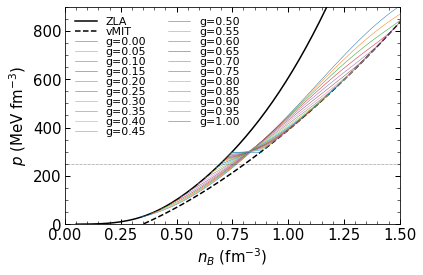

In [19]:
plt.figure(figsize=figsize)
for i,data_i,label_i,ls in zip(range(2),[data_ZLA,data_vMIT],['ZLA','vMIT'],['-','--']):
    plt.plot(data_i[1],data_i[3]+data_i[9]+data_i[12],label=label_i,ls=ls,color='k')

for eos_array_i,i in zip(data_MIX[:,2:5],range(21)):
    plt.plot(eos_array_i[0],eos_array_i[2],label='g=%.2f'%(i/20),lw=0.5)

plt.axhline(y=data_MIX[10,4,0],ls=':',color='k',lw=0.5)
plt.xlim(0,1.5)
plt.ylim(0,900)

plt.legend(frameon=False,fontsize=11,ncol=2,labelspacing=0)

plt.xlabel('$n_B$ (fm$^{-3}$)',fontsize=15)
plt.ylabel('$p$ (MeV fm$^{-3}$)',fontsize=15)

plt.savefig('../figures_ZLA/EOS_Gibbs_to_Maxwell.pdf',bbox_inches = 'tight',format='pdf')


In [34]:
data_ZLA[1]

array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37,
       0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48,
       0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59,
       0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 ,
       0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81,
       0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92,
       0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03,
       1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14,
       1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25,
       1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36,
       1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47,
       1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.

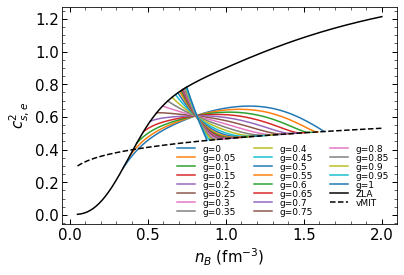

In [40]:
eos_name_MIX=['g=0','g=0.05','g=0.1','g=0.15','g=0.2','g=0.25','g=0.3','g=0.35','g=0.4','g=0.45','g=0.5','g=0.55','g=0.6','g=0.65','g=0.7','g=0.75','g=0.8','g=0.85','g=0.9','g=0.95','g=1']
for cs2ad_MIX_i, data_MIX_i,eos_name_MIX_i in zip(cs2ad_MIX,data_MIX,eos_name_MIX):
    plt.plot(data_MIX_i[2],cs2ad_MIX_i,label=eos_name_MIX_i)
plt.plot(data_ZLA[1],data_ZLA[-1],'k-',label='ZLA')
plt.plot(data_vMIT[1],data_vMIT[-1],'k--',label='vMIT')
plt.xlabel('$n_B$ (fm$^{-3}$)',fontsize=15)
plt.ylabel('$c_{s,e}^2$',fontsize=15)
plt.legend(frameon=False,ncol=3,labelspacing=0,loc=4,fontsize=9)
plt.savefig('../figures_ZLA/cs2adiabaric_Gibbs_to_Maxwell.pdf',bbox_inches = 'tight',format='pdf')

(1e-07, 10)

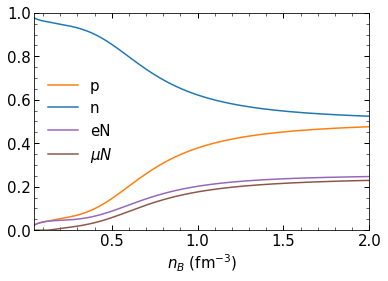

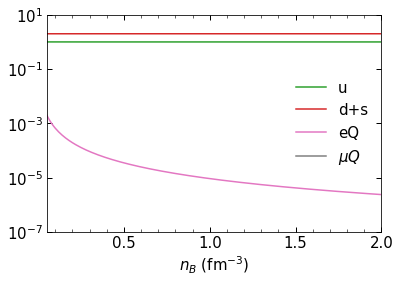

In [13]:
plt.figure()
plt.plot(data_ZLA[1],data_ZLA[0],label='p',color=color_list_10[0])
plt.plot(data_ZLA[1],1-data_ZLA[0],label='n',color=color_list_10[1])
plt.plot(data_ZLA[1],data_ZLA[7]/data_ZLA[1],label='eN',color=color_list_10[4])
plt.plot(data_ZLA[1],data_ZLA[10]/data_ZLA[1],label='$\mu N$',color=color_list_10[5])
plt.legend(frameon=False,fontsize=15)
plt.xlabel('$n_B$ (fm$^{-3}$)',fontsize=15)
plt.xlim(data_ZLA[1].min(),data_ZLA[1].max())
plt.ylim(0,1)

plt.figure()
plt.plot(data_ZLA[1],1+data_vMIT[0],label='u',color=color_list_10[2])
plt.plot(data_ZLA[1],2-data_vMIT[0],label='d+s',color=color_list_10[3])
plt.plot(data_ZLA[1],data_vMIT[7]/data_vMIT[1],label='eQ',color=color_list_10[6])
plt.plot(data_ZLA[1],data_vMIT[10]/data_vMIT[1],label='$\mu Q$',color=color_list_10[7])
plt.legend(frameon=False,fontsize=15)
plt.yscale('log')
plt.xlabel('$n_B$ (fm$^{-3}$)',fontsize=15)
plt.xlim(data_ZLA[1].min(),data_ZLA[1].max())
plt.ylim(1e-7,10)


/var/folders/lb/w1dqk53d0656wnhbhpphtq500000gn/T/ipykernel_38694/3280402489.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=figsize)


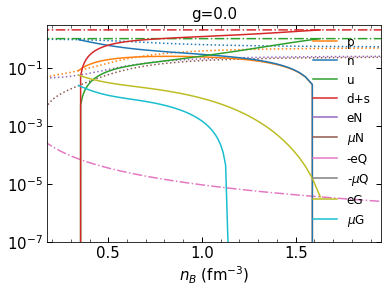

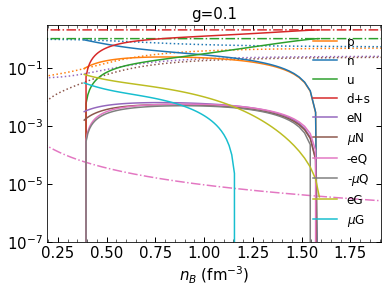

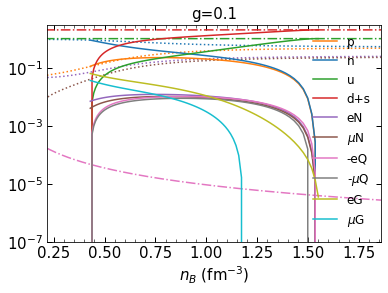

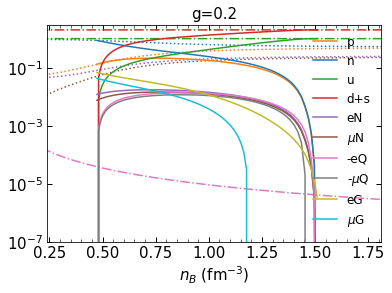

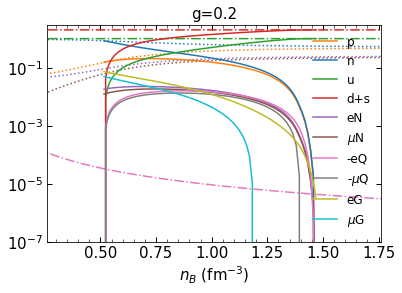

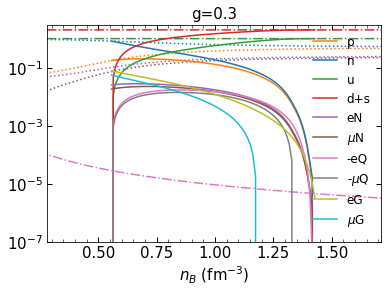

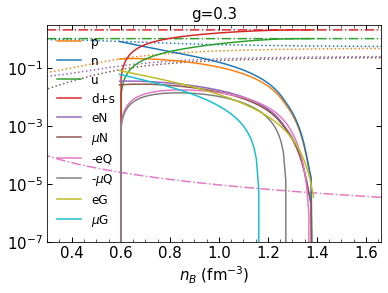

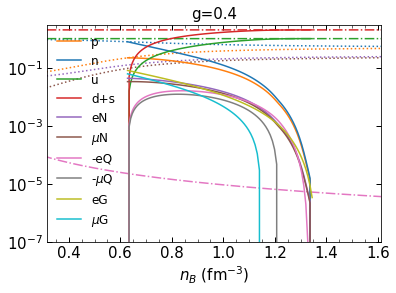

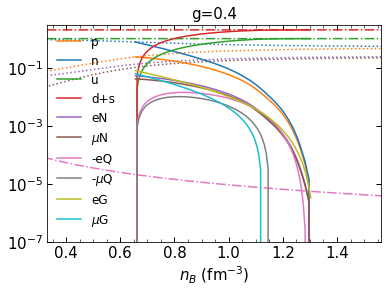

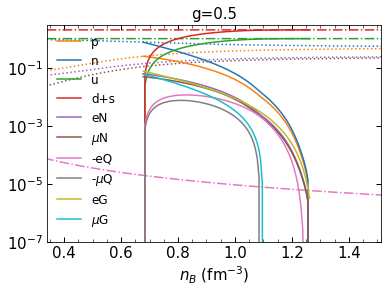

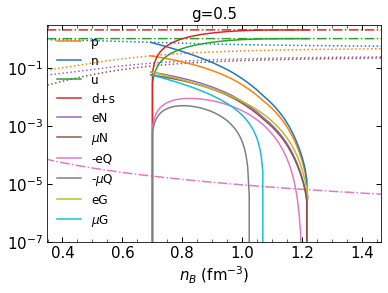

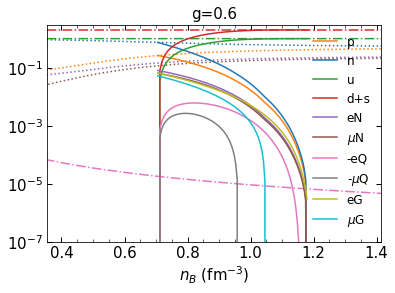

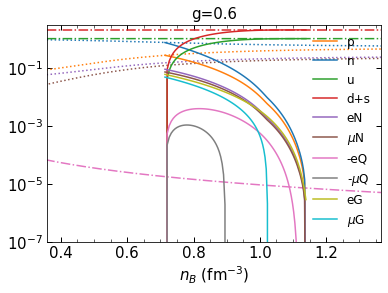

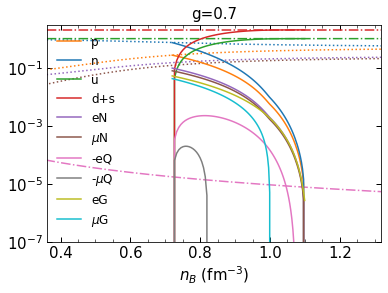

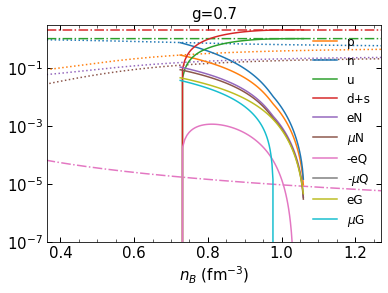

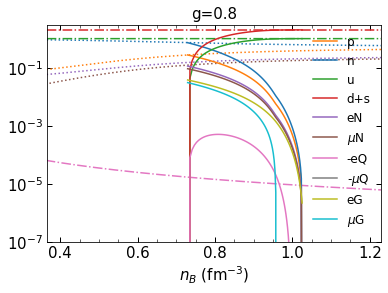

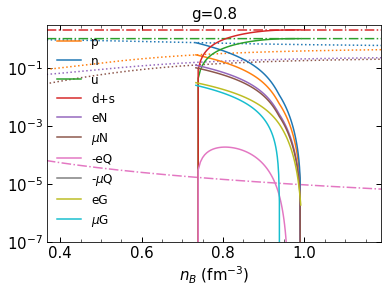

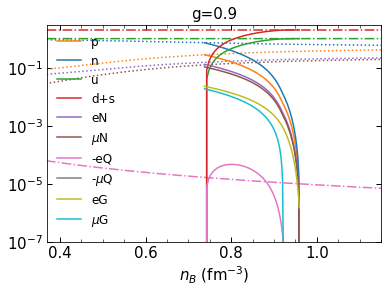

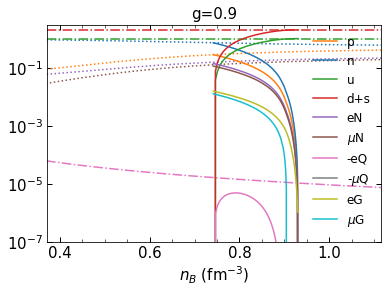

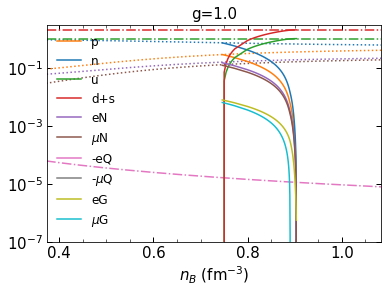

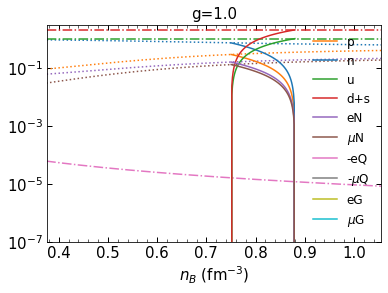

In [15]:
particle_list=['p','n','u','d+s','eN','$\mu$N','-eQ','-$\mu$Q','eG','$\mu$G']
for data_MIX_i in data_MIX:
    plt.figure(figsize=figsize)
    plt.plot(data_ZLA[1],data_ZLA[0],color=color_list_10[0],ls=':')
    plt.plot(data_ZLA[1],1-data_ZLA[0],color=color_list_10[1],ls=':')
    plt.plot(data_ZLA[1],1+data_vMIT[0],color=color_list_10[2],ls='-.')
    plt.plot(data_ZLA[1],2-data_vMIT[0],color=color_list_10[3],ls='-.')
    plt.plot(data_ZLA[1],data_ZLA[7]/data_ZLA[1],color=color_list_10[4],ls=':')
    plt.plot(data_ZLA[1],data_ZLA[10]/data_ZLA[1],color=color_list_10[5],ls=':')
    plt.plot(data_ZLA[1],data_vMIT[7]/data_vMIT[1],color=color_list_10[6],ls='-.')
    plt.plot(data_ZLA[1],data_vMIT[10]/data_vMIT[1],color=color_list_10[7],ls='-.')

    g=data_MIX_i[0]
    f=data_MIX_i[1]
    ratio_list=np.array([f,f,1-f,1-f,f*g,f*g,(1-f)*g,(1-f)*g,1-g+0*f,1-g+0*f])
    p_n_u_ds_eN_muN_eQ_muN_eG_muG=np.copy(data_MIX_i[-10:])
    p_n_u_ds_eN_muN_eQ_muN_eG_muG*=ratio_list
    for color_i,p_n_u_ds_eN_muN_eQ_muN_eG_muG_i,label_i in zip(color_list_10,p_n_u_ds_eN_muN_eQ_muN_eG_muG,particle_list):
        if(label_i in ['-eQ','-$\mu$Q']):
            plt.plot(data_MIX_i[2],-p_n_u_ds_eN_muN_eQ_muN_eG_muG_i/data_MIX_i[2],color=color_i,label=label_i)
        else:
            plt.plot(data_MIX_i[2],p_n_u_ds_eN_muN_eQ_muN_eG_muG_i/data_MIX_i[2],color=color_i,label=label_i)
    
    plt.title('g=%.1f'%(1.001*g[0]),fontsize=15)
    plt.legend(frameon=False,fontsize=12)
    plt.yscale('log')
    plt.xlim(0.5*data_MIX_i[2].min(),1.2*data_MIX_i[2].max())
    plt.ylim(1e-7,3)
    plt.xlabel('$n_B$ (fm$^{-3}$)',fontsize=15)
    
    plt.savefig('../figures_ZLA/particle_fraction_emu_g%d.pdf'%int(100.01*g[0]),bbox_inches = 'tight',format='pdf')

/var/folders/lb/w1dqk53d0656wnhbhpphtq500000gn/T/ipykernel_38694/564554058.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=figsize)


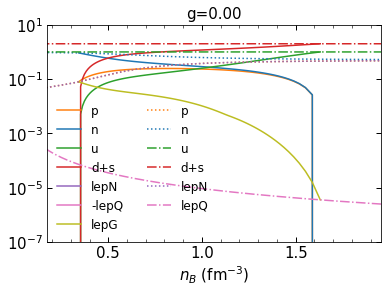

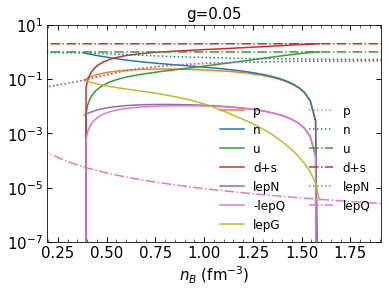

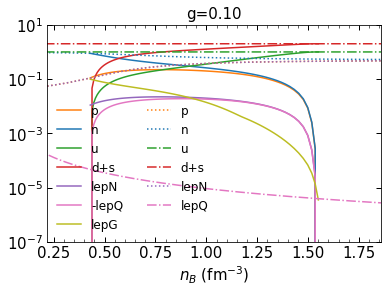

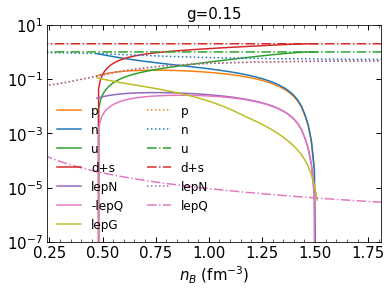

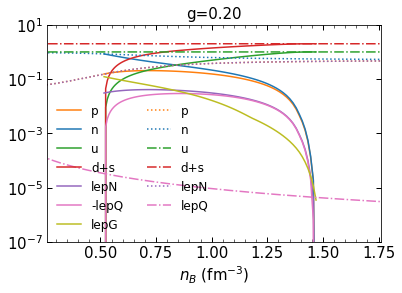

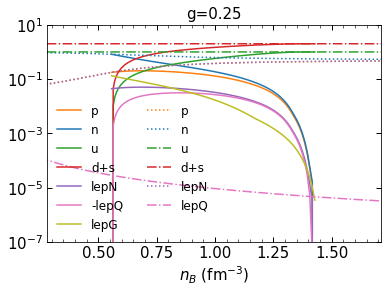

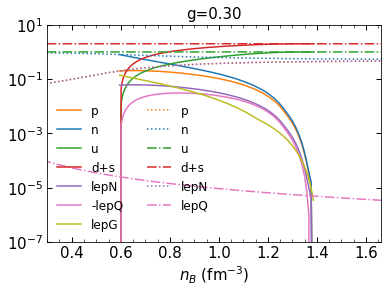

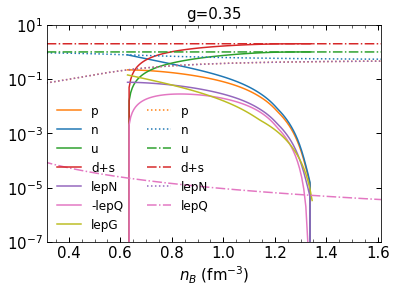

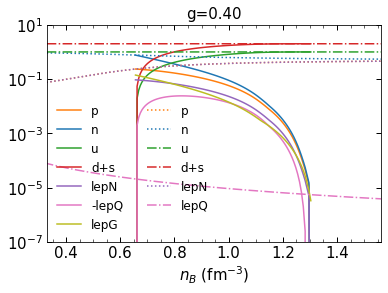

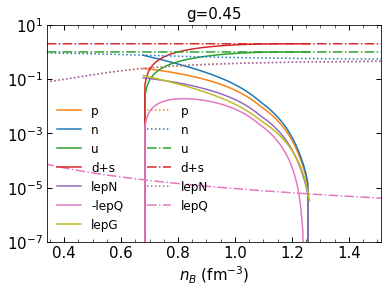

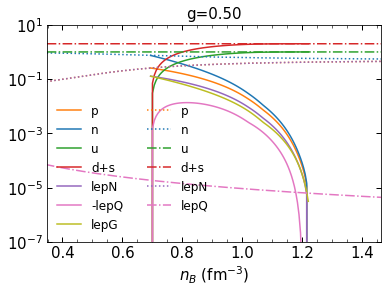

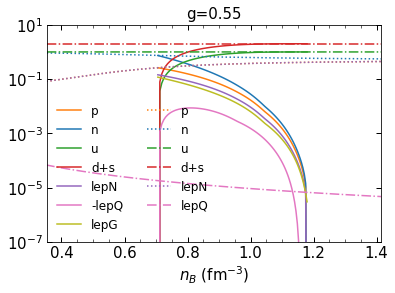

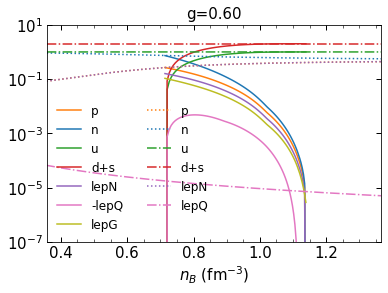

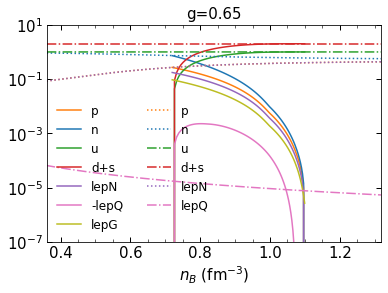

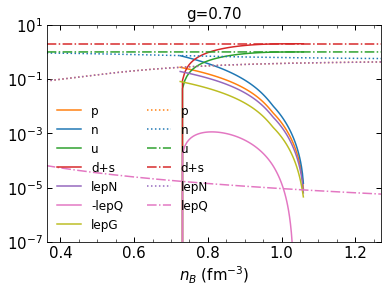

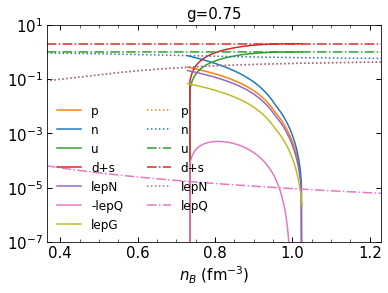

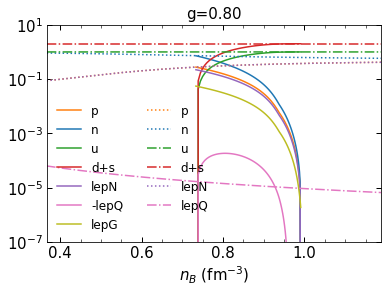

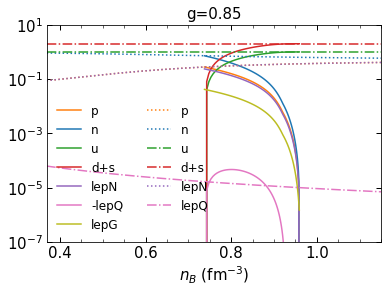

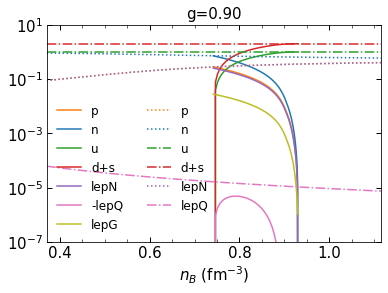

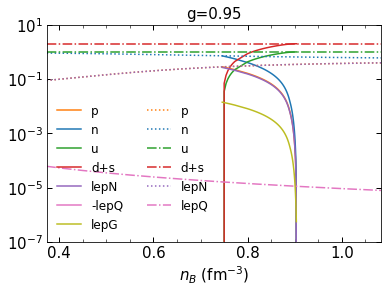

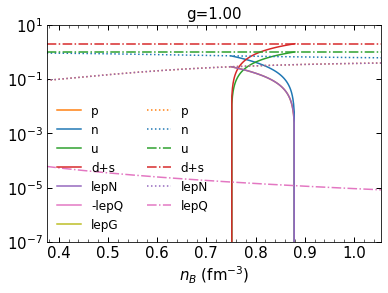

In [42]:
particle_list=['p','n','u','d+s','lepN','-lepQ','lepG']
for data_MIX_i in data_MIX:
    plt.figure(figsize=figsize)
    g=data_MIX_i[0]
    f=data_MIX_i[1]
    ratio_list=np.array([f,f,1-f,1-f,f*g,f*g,(1-f)*g,(1-f)*g,1-g+0*f,1-g+0*f])
    p_n_u_ds_eN_muN_eQ_muN_eG_muG=np.copy(data_MIX_i[-10:])
    p_n_u_ds_eN_muN_eQ_muN_eG_muG*=ratio_list
    for color_i,p_n_u_ds_eN_muN_eQ_muN_eG_muG_i,label_i in zip(color_list_10[:4],p_n_u_ds_eN_muN_eQ_muN_eG_muG,particle_list):
            plt.plot(data_MIX_i[2],p_n_u_ds_eN_muN_eQ_muN_eG_muG_i/data_MIX_i[2],color=color_i,label=label_i)
    plt.plot(data_MIX_i[2],(p_n_u_ds_eN_muN_eQ_muN_eG_muG[4]+p_n_u_ds_eN_muN_eQ_muN_eG_muG[5])/data_MIX_i[2],color=color_list_10[4],label=particle_list[4])
    plt.plot(data_MIX_i[2],-(p_n_u_ds_eN_muN_eQ_muN_eG_muG[6]+p_n_u_ds_eN_muN_eQ_muN_eG_muG[7])/data_MIX_i[2],color=color_list_10[6],label=particle_list[5])
    plt.plot(data_MIX_i[2],(p_n_u_ds_eN_muN_eQ_muN_eG_muG[8]+p_n_u_ds_eN_muN_eQ_muN_eG_muG[9])/data_MIX_i[2],color=color_list_10[8],label=particle_list[6])
    
    plt.plot(data_ZLA[1],data_ZLA[0],color=color_list_10[0],ls=':',label='p')
    plt.plot(data_ZLA[1],1-data_ZLA[0],color=color_list_10[1],ls=':',label='n')
    plt.plot(data_ZLA[1],1+data_vMIT[0],color=color_list_10[2],ls='-.',label='u')
    plt.plot(data_ZLA[1],2-data_vMIT[0],color=color_list_10[3],ls='-.',label='d+s')
    plt.plot(data_ZLA[1],(data_ZLA[7]+data_ZLA[10])/data_ZLA[1],color=color_list_10[4],ls=':',label='lepN')
    plt.plot(data_ZLA[1],(data_vMIT[7]+data_vMIT[10])/data_vMIT[1],color=color_list_10[6],ls='-.',label='lepQ')


    plt.title('g=%.2f'%(1.001*g[0]),fontsize=15)
    plt.legend(ncol=2,frameon=False,fontsize=12)
    plt.yscale('log')
    plt.xlim(0.5*data_MIX_i[2].min(),1.2*data_MIX_i[2].max())
    plt.ylim(1e-7,10)
    plt.xlabel('$n_B$ (fm$^{-3}$)',fontsize=15)
    
    plt.savefig('../figures_ZLA/particle_fraction_g%d.pdf'%int(100.01*g[0]),bbox_inches = 'tight',format='pdf')

In [41]:
data_MIX.shape

(21, 22, 100)

In [56]:
result_from_one_ZLA=np.loadtxt('./ZLA_result.txt',skiprows=1)

result_vMIT=np.loadtxt('./vMIT_result.txt',skiprows=1)


result_from_max_MIX=[]
for i in range(21):
    result_from_max_MIX.append(np.loadtxt('./MIX_a20_B165_g%d_result.txt'%(5*i),skiprows=1))
result_from_max_MIX=np.array(result_from_max_MIX)


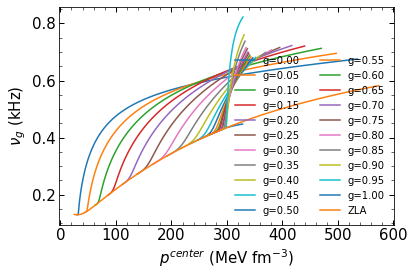

In [47]:
plt.figure()
for i in range(21):
    plt.plot(result_from_max_MIX[i][:,0],result_from_max_MIX[i][:,8]/(2000*np.pi),label='g=%.2f'%(5*i/100))
plt.plot(result_from_one_ZLA[:,0],result_from_one_ZLA[:,8]/(2000*np.pi),label='ZLA')
plt.legend(frameon=False,ncol=2)
plt.xlabel('$p^{center}$ (MeV fm$^{-3}$)',fontsize=15)
plt.ylabel('$\\nu_g$ (kHz)',fontsize=15)
plt.savefig('../figures_ZLA/gmode_frequency_pc.pdf',bbox_inches = 'tight',format='pdf')

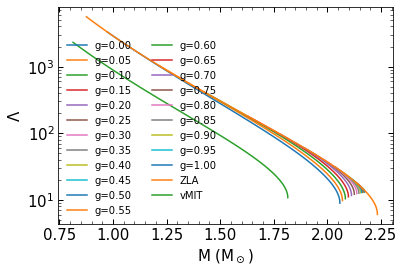

In [57]:
plt.figure()
for i in range(21):
    plt.plot(result_from_max_MIX[i][:,1],result_from_max_MIX[i][:,7],label='g=%.2f'%(5*i/100))
plt.plot(result_from_one_ZLA[:,1],result_from_one_ZLA[:,7],label='ZLA')
plt.plot(result_vMIT[:,1],result_vMIT[:,7],label='vMIT')
plt.legend(frameon=False,ncol=2)
plt.xlabel('M (M$_\odot$)',fontsize=15)
plt.ylabel('$\Lambda$',fontsize=15)
plt.yscale('log')
plt.savefig('../figures_ZLA/tidal_deformability_mass.pdf',bbox_inches = 'tight',format='pdf')